##### Master Degree in Computer Science and Data Science for Economics

# Example of a naive search engine

### Alfio Ferrara

In [11]:
from nltk.tokenize import word_tokenize
from transformers import BertTokenizer
import pymongo
import pandas as pd

In [2]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [4]:
db = pymongo.MongoClient()['cousine']
collections = db['recipes']
docs = [f"{x['recipe_title']}: {x['description']}" for x in collections.find({}, 
                                                                             {'_id': 0, 
                                                                              'recipe_title': 1, 
                                                                              'description': 1})]

## Indexing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
def bert_tokenize(text):
    return tokenizer.tokenize(text)

In [8]:
vectorizer = CountVectorizer(tokenizer=bert_tokenize, token_pattern=None)
X = vectorizer.fit_transform(docs).toarray()

In [14]:
Xdf = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

In [16]:
docs[0]

'Roasted Peppers And Mushroom Tortilla Pizza Recipe:  is a quicker version pizza to satisfy your cravings. It is a very quick and easy recipe for days that you do not feel like cooking a full fledged meal. With the preference of toppings of your choice this pizza recipe is definitely a winner at any home. The toppings used in this  has some roasted peppers, mushroom with loaded cheese and marinara sauce. Enjoy this easy recipe with your favorite toppings.  This is a great recipe, if you are looking for an Indian/Fusion Pizza or a Homemade Pizza recipe. Serve  along with   and   for a weekend night dinner. If you like this recipe, you can also try other  for your weekend dinner:'

In [18]:
Xdf.loc[0].sort_values(ascending=False).head(10)

a         7
.         7
recipe    7
pizza     5
this      5
with      4
your      4
for       4
and       4
you       4
Name: 0, dtype: int64

## Search

In [20]:
query = "A recipe for a real italian pizza with mushrooms"
q = vectorizer.transform([query]).toarray().reshape(1, -1)
q 

array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 8548))

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
sigma = cosine_similarity(q, X)
sigma.shape 

(1, 7997)

In [27]:
query_answer = pd.Series(sigma[0], index=range(len(docs)))
A = query_answer.sort_values(ascending=False).head(10)

In [25]:
from nltk.tokenize import sent_tokenize

In [26]:
def pretty_print(doc):
    return "\n".join([s for s in sent_tokenize(doc)])

In [28]:
for i, s in A.items():
    print(f"Document {i} with similarity {s}")
    print(pretty_print(docs[i]))
    print()

Document 4069 with similarity 0.5437456166805353
Easy Tomato And Cheese Mini Pizza Recipe: The Easy Tomato And Cheese Mini Pizza Recipe is a brilliant and simple pizza that is packed with flavors from the fresh tomatoes marinated in a basil and olive oil.
It makes a super simple and easy pizza to make for a dinner for two along with a glass of wine and a delicious dessert.
Serve Easy Tomato And Cheese Mini Pizza Recipe along with   and a delectable  .
Serve it along with a glass of wine for a romantic weekend dinner.
If you like this Easy Tomato And Cheese Mini Pizza Recipe, take a look at more pizza recipes like

Document 3481 with similarity 0.542286764221675
Chicken Pizza With Caramelised Red Onion Recipe: Chicken Pizza With Caramelised Red Onion Recipe will be a favourite pizza among all.
In this recipe, we have caramelised the onion to make it like a jam, grilled the chicken and then spread it over the base to make a delicious tasting pizza.
Pizza is a dish that is eaten as a cele

## IDF

##### Master Degree in Computer Science and Data Science for Economics

# TfIdf for searching

### Alfio Ferrara

In [29]:
from collections import defaultdict

In [31]:
DF = defaultdict(lambda: 0)
for doc in docs:
    tokens = set(bert_tokenize(doc))
    for token in tokens:
        DF[token] += 1
DF = pd.Series(DF)

In [34]:
DF.sort_values(ascending=False)
IDF = len(docs) / DF 
IDF.sort_values(ascending=True)


:               1.000000
recipe          1.012791
.               1.017042
,               1.085369
and             1.203461
                ...     
angle        7997.000000
mao          7997.000000
guarantee    7997.000000
serious      7997.000000
couples      7997.000000
Length: 8548, dtype: float64

In [40]:
import matplotlib.pyplot as plt
import numpy as np

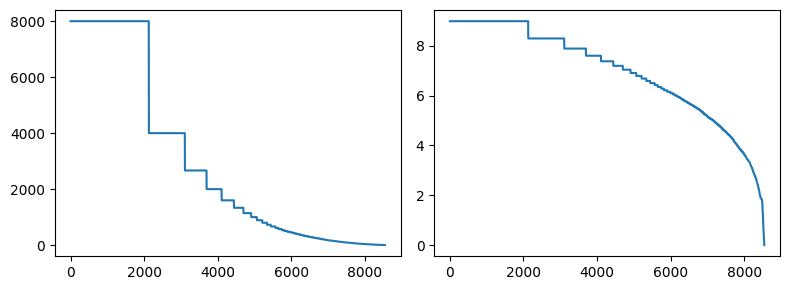

In [41]:
fig, ax = plt.subplots(figsize=(8, 3), ncols=2)
ax[0].plot(IDF.sort_values(ascending=False).values)
ax[1].plot(np.log(IDF.sort_values(ascending=False).values))
plt.tight_layout()
plt.show()

## TFIDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfv = TfidfVectorizer(tokenizer=bert_tokenize, token_pattern=None)

In [44]:
Xtfidf = tfv.fit_transform(docs).toarray()
TFIDF = pd.DataFrame(Xtfidf, columns=tfv.get_feature_names_out())

In [45]:
TFIDF

,!,"""",##0,##1,##2,##3,##5,##6,##7,##9,##a,##aa,##ab,##aba,##abad,##abas,##abi,##able,##ably,##ac,##aca,##aceous,##ach,##achal,##ache,##achi,##acies,##ack,##aco,##act,##active,##ad,##ada,##ade,##adi,##ads,##ae,##af,##ag,##aga,...,zoo,zu,|,æ,μ,अ,आ,उ,ए,क,ख,ग,च,ज,ट,ड,त,थ,द,ध,न,प,ब,भ,म,य,र,ल,व,श,ष,स,ह,।,–,—,‘,’,“,”
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053267,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058347,0.0,0.0,0.0,0.0,0.0,0.0,0.096569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.219226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143897,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.383469,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121615,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.111916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
TFIDF.loc[0].sort_values(ascending=False).head(10)

pizza       0.518150
topping     0.299194
peppers     0.187723
mushroom    0.186037
fledged     0.168540
a           0.158859
quicker     0.152474
##s         0.145422
your        0.144245
weekend     0.137894
Name: 0, dtype: float64